# (Spam Ham) Naive Bayes Classifier

## Importing the Packages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [4]:

docs=pd.read_table('spamhamdataset',header=None,names=['Class','SMS'])
docs

,Class,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
docs.head()

,Class,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
docs.SMS.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: SMS, dtype: object

In [8]:
docs.shape

(5572, 2)

In [9]:
docs.describe()

,Class,SMS
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
docs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [17]:
docs.isna().mean().sum()

np.float64(0.0)

### Mapping the label as spam and ham 

In [14]:
docs['Label']=docs.Class.map({'ham':0,'spam':1})
docs.head()

,Class,SMS,Label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [15]:
x=docs.SMS
y=docs.Label

In [16]:
x.shape

(5572,)

In [17]:
y.shape

(5572,)

In [18]:
from sklearn.model_selection import train_test_split as  tts

In [19]:
X_train,x_test,Y_train,y_test=tts(x,y,test_size=0.30)

In [20]:
X_train.shape

(3900,)

In [21]:
x_test.shape

(1672,)

In [22]:
Y_train.shape

(3900,)

In [23]:
y_test.shape

(1672,)

In [28]:
X_train.head()

5471                                                  Yup
394     Yes i think so. I am in office but my lap is i...
3616    I enjoy watching and playing football and bask...
734     Even u dont get in trouble while convincing..j...
3439                            Its good to hear from you
Name: SMS, dtype: object

In [24]:
Y_train.head()

60      0
3206    0
4066    0
4762    0
4827    0
Name: Label, dtype: int64

## Vectorizing the text : Data Transformation 

In [30]:
from sklearn.feature_extraction.text import CountVectorizer as cvec

In [31]:
vector=cvec()

In [ ]:
vector.fit([x[0]])
print(vector.vocabulary_)
newval=vector.transform([x[0]])
print(newval)
vector.get_feature_names_out()
print(newval.toarray())

### Removing stop words. Stopwords are the words which are used commonly in sentences or words we speak or text we need to remove those to make it effcient 

In [25]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\haris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stopword=set(stopwords.words('english'))
print(stopwords)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
vector=CountVectorizer(stop_words=('english'))

In [27]:
vector.fit([x[0]])
print(vector.vocabulary_)
vector.transform([x[0]])
vector.get_feature_names_out()


{'jurong': 8, 'point': 10, 'crazy': 5, 'available': 1, 'bugis': 3, 'great': 7, 'world': 12, 'la': 9, 'buffet': 2, 'cine': 4, 'got': 6, 'amore': 0, 'wat': 11}


array(['amore', 'available', 'buffet', 'bugis', 'cine', 'crazy', 'got',
       'great', 'jurong', 'la', 'point', 'wat', 'world'], dtype=object)

### Training the entire xtrain 

In [28]:
from sklearn.feature_extraction.text import CountVectorizer as countvc
vectorsn=countvc(stop_words=('english'))

In [29]:
vectorsn.fit(X_train)

CountVectorizer(stop_words='english')

In [30]:
vectorsn.vocabulary_

{'gonna': 2885,
 'pick': 4661,
 'burger': 1416,
 'way': 6671,
 'home': 3136,
 'pain': 4531,
 'killing': 3549,
 'oh': 4410,
 'yes': 6903,
 've': 6538,
 'just': 3492,
 'little': 3742,
 'weather': 6684,
 'kind': 3552,
 'coccooning': 1710,
 'dont': 2208,
 'kick': 3541,
 'coco': 1714,
 '140': 268,
 'ard': 949,
 'rest': 5174,
 '180': 295,
 'price': 4855,
 'bedrm': 1166,
 '900': 669,
 'haha': 2982,
 'thinkin': 6161,
 'did': 2111,
 'charge': 1579,
 'camera': 1476,
 'got': 2901,
 'things': 6158,
 'pub': 4928,
 'later': 3631,
 'noe': 4308,
 'da': 1967,
 'car': 1493,
 'lar': 3621,
 'wearing': 6681,
 'shorts': 5507,
 'pls': 4717,
 'send': 5408,
 'address': 752,
 'sir': 5562,
 'bucks': 1397,
 'jay': 3426,
 'noncomittal': 4319,
 'worry': 6824,
 'guess': 2960,
 'busy': 1428,
 'sorry': 5685,
 'man': 3910,
 'stash': 5802,
 'ran': 5000,
 'dry': 2264,
 'night': 4293,
 'sunday': 5934,
 'free': 2703,
 'msg': 4161,
 'ringtone': 5214,
 'http': 3187,
 'tms': 6230,
 'widelive': 6746,
 'com': 1738,
 'index': 33

In [31]:
vectorsn.get_feature_names_out()

array(['00', '000', '000pes', ..., 'èn', 'ú1', '〨ud'], dtype=object)

In [32]:
X_train_trans=vectorsn.fit_transform(X_train)
X_train_trans.shape

(3900, 6952)

In [33]:
x_test_trans=vectorsn.transform(x_test)
x_test_trans.shape

(1672, 6952)

## Importing naive bayes and it uses BernouliiNB 

In [34]:
from sklearn.naive_bayes import BernoulliNB as bnb

In [35]:
naive=bnb()

In [36]:
naive.fit(X_train_trans,Y_train)

BernoulliNB()

In [37]:
naive_pred=naive.predict(x_test_trans)
print(naive_pred)

[0 0 1 ... 0 1 0]


### Predict Posterior Probablity 

In [38]:
naive_prob=naive.predict_proba(x_test_trans)
print(naive_prob)

[[1.00000000e+00 3.73473810e-14]
 [1.00000000e+00 2.47685330e-11]
 [2.46297616e-06 9.99997537e-01]
 ...
 [1.00000000e+00 1.88844437e-12]
 [9.19825259e-12 1.00000000e+00]
 [1.00000000e+00 1.04675039e-11]]


### Predicting with Single value -- We only need to do transform data not fit transform because bernoulli wont accept thing if its column feature doesnt matches 

In [47]:
val="Thanks for donating Rs.100 for ARMED FORCES FLAG DAY FUND, Tamil Nadu. Click https://flagday.tn.gov.in/sms_rcpt.aspx?txn_id=FL4066342954 to download the receipt- TNGOVT"
# out=0
print(val)
print(out)

Thanks for donating Rs.100 for ARMED FORCES FLAG DAY FUND, Tamil Nadu. Click https://flagday.tn.gov.in/sms_rcpt.aspx?txn_id=FL4066342954 to download the receipt- TNGOVT
0


In [48]:
transf_sin_val=vectorsn.transform([val])

In [49]:
transf_sin_val.shape

(1, 6952)

In [50]:
pred_sin_val=naive.predict(transf_sin_val)

pred_prob_sin_value=naive.predict_proba(transf_sin_val)
value=np.array(pred_prob_sin_value)

prob_value = f"{value[0, 0]:.4f}"
print(f"Output from Predictor: {pred_sin_val}")

print(f"Output Probability from Predictor: {prob_value}")
# print(f"Actual Output : {out}")

Output from Predictor: [0]
Output Probability from Predictor: 0.9935


## Checking the Metrics of the model

In [52]:
from sklearn.metrics import confusion_matrix as cm, accuracy_score as acc, precision_score as ps,classification_report as cr
from sklearn.metrics import auc,roc_auc_score,roc_curve

In [53]:
confuse=cm(y_test,naive_pred)
print(confuse)

[[1439    0]
 [  47  186]]


In [54]:
accuracy=acc(y_test,naive_pred)
accuracy

0.97188995215311

In [55]:
precision=ps(y_test,naive_pred)
print(precision)

1.0


In [56]:
classreport=cr(y_test,naive_pred)
print(classreport)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1439
           1       1.00      0.80      0.89       233

    accuracy                           0.97      1672
   macro avg       0.98      0.90      0.94      1672
weighted avg       0.97      0.97      0.97      1672



In [57]:
qnum=auc(x_test_trans,naive_pred)
print(qnum)

InvalidParameterError: The 'x' parameter of auc must be an array-like. Got <Compressed Sparse Row sparse matrix of dtype 'int64'
	with 11415 stored elements and shape (1672, 6929)> instead.

In [58]:
auc_roc=roc_auc_score(y_test,naive_pred)
print(auc_roc)

0.8991416309012876


In [59]:
curve=roc_curve(y_test,naive_pred)
print(curve)

(array([0., 0., 1.]), array([0.        , 0.79828326, 1.        ]), array([inf,  1.,  0.]))


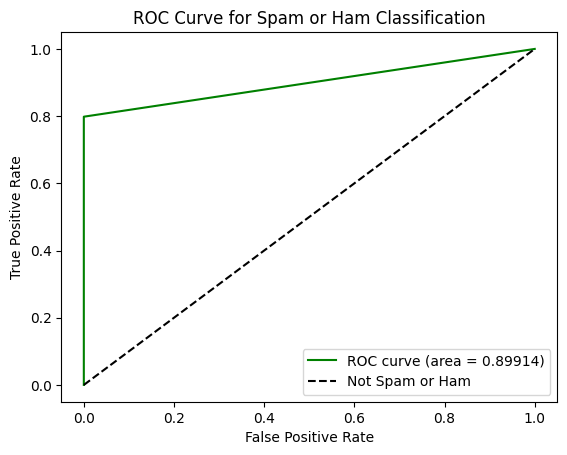

In [60]:
fpr, tpr, thresholds = roc_curve(y_test, naive_pred) 
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, color='green', label='ROC curve (area = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Not Spam or Ham')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Spam or Ham Classification')
plt.legend()
plt.show()

# Exporting the model using pickle

In [51]:
import pickle as pk

In [52]:
pk.dump(naive,open('Spam_pred_algorithm.sav','wb'))